# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000


In [5]:
#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [6]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [7]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent = 2, sort_keys = True))


{
  "data": {
    "1": {
      "circulating_supply": 19259568,
      "id": 1,
      "last_updated": 1673497503,
      "max_supply": 21000000,
      "name": "Bitcoin",
      "quotes": {
        "USD": {
          "market_cap": 350972018519,
          "percent_change_1h": -0.0142199229980999,
          "percent_change_24h": 4.66894379731357,
          "percent_change_7d": 8.1059667595357,
          "percentage_change_1h": -0.0142199229980999,
          "percentage_change_24h": 4.66894379731357,
          "percentage_change_7d": 8.1059667595357,
          "price": 18221.45,
          "volume_24h": 31635860566
        }
      },
      "rank": 1,
      "symbol": "BTC",
      "total_supply": 19259568,
      "website_slug": "bitcoin"
    }
  },
  "metadata": {
    "error": null,
    "num_cryptocurrencies": 3119,
    "timestamp": 1673497503
  }
}


In [8]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent = 2, sort_keys = True))


{
  "data": {
    "1027": {
      "circulating_supply": 120523406,
      "id": 1027,
      "last_updated": 1673497472,
      "max_supply": 120523406,
      "name": "Ethereum",
      "quotes": {
        "USD": {
          "market_cap": 169015433039,
          "percent_change_1h": 0.028300412650358,
          "percent_change_24h": 5.36243827168317,
          "percent_change_7d": 11.6232946335404,
          "percentage_change_1h": 0.028300412650358,
          "percentage_change_24h": 5.36243827168317,
          "percentage_change_7d": 11.6232946335404,
          "price": 1402.48,
          "volume_24h": 9240255184
        }
      },
      "rank": 2,
      "symbol": "ETH",
      "total_supply": 120523406,
      "website_slug": "ethereum"
    }
  },
  "metadata": {
    "error": null,
    "num_cryptocurrencies": 3119,
    "timestamp": 1673497472
  }
}


#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [9]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
print(f"The current price of BTC is: ${btc_price: .2f}.")


The current price of BTC is: $ 18221.45.


In [10]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
print(f"The current price of ETH is: ${eth_price: .2f}.")


The current price of ETH is: $ 1402.48.


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [11]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Check btc_price & btc_coins
display(btc_price)
display(btc_coins)

# Print current value of your holding in BTC
print(f"The current value of your holding in BTC is: ${btc_value}.")


18221.45

1.2

The current value of your holding in BTC is: $21865.74.


In [12]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Check eth_price & eth_coins
display(eth_price)
display(eth_coins)

# Print current value of your holding in ETH
print(f"The current value of your holding in ETH is: ${eth_value}.")


1402.48

5.3

The current value of your holding in ETH is: $7433.144.


In [13]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"The current cryptocurrency wallet balance is: ${total_crypto_wallet: .2f}.")


The current cryptocurrency wallet balance is: $ 29298.88.


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [14]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [15]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Check that the values were imported correctly by evaluating the type of each
display(type(alpaca_api_key))
display(type(alpaca_secret_key))

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")


str

str

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [16]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1Day
timeframe = "1Day"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07

start_date = pd.Timestamp("2023-01-09", tz = "America/New_York").isoformat()
end_date = pd.Timestamp("2023-01-09", tz = "America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [17]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Check how 'prices_df' looks right now
display(prices_df)

# Reorganize the DataFrame
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis = 1)
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis = 1)

# Check how 'prices_df' looks right now
display(prices_df)

# Concatenate the ticker DataFrames
prices_df = pd.concat([SPY, AGG], axis = 1, keys = ["SPY","AGG"])

# Review the first 5 rows of the Alpaca DataFrame
display((prices_df).head())


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2023-01-09 05:00:00+00:00,99.06,99.5,99.00,99.34,7849650,25384,99.318503,AGG
2023-01-09 05:00:00+00:00,390.37,393.7,387.67,387.86,73999806,550008,390.361862,SPY


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2023-01-09 05:00:00+00:00,99.06,99.5,99.00,99.34,7849650,25384,99.318503,AGG
2023-01-09 05:00:00+00:00,390.37,393.7,387.67,387.86,73999806,550008,390.361862,SPY


SPY                                   \
                             open   high     low   close    volume   
timestamp                                                            
2023-01-09 05:00:00+00:00  390.37  393.7  387.67  387.86  73999806   

                                                     AGG                     \
                          trade_count        vwap   open  high   low  close   
timestamp                                                                     
2023-01-09 05:00:00+00:00      550008  390.361862  99.06  99.5  99.0  99.34   

                                                           
                            volume trade_count       vwap  
timestamp                                                  
2023-01-09 05:00:00+00:00  7849650       25384  99.318503

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [18]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
# Note that using float() makes it easier to read.
agg_close_price = float(prices_df["AGG"]["close"])

# Print the AGG closing price
print(f"The AGG closing prices is ${agg_close_price}.")

The AGG closing prices is $99.34.


In [19]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = prices_df["SPY"]["close"]
spy_close_price = float(spy_close_price)

# Print the SPY closing price
print(f"The SPY closing price is: ${spy_close_price}.")


The SPY closing price is: $387.86.


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [20]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Check agg_shares & agg_close_price
display(agg_shares)
display(agg_close_price)

# Print the current value of the bond portfolio
print(f"The current value of the bond portfolio is: ${agg_value: .2f}.")

200

99.34

The current value of the bond portfolio is: $ 19868.00.


In [21]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Check spy_shares & spy_close_price
display(spy_shares)
display(spy_close_price)

# Print the current value of the stock portfolio
print(f"The current value of the stock portfolio is: ${spy_value: .2f}.")


110

387.86

The current value of the stock portfolio is: $ 42664.60.


In [22]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
# YOUR CODE HERE

print(f"The current balance of the stock and bond portion of the portfolio is: ${total_stocks_bonds: .2f}.")


The current balance of the stock and bond portion of the portfolio is: $ 62532.60.


In [23]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency wallet to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance
print(f"The current cryptocurrency wallet balance is: ${total_crypto_wallet: .2f}.")

# Print the total_portfolio balance
print(f"The total value of the member's entire savings portfolio is: ${total_portfolio: .2f}.")


The current cryptocurrency wallet balance is: $ 29298.88.
The total value of the member's entire savings portfolio is: $ 91831.48.


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [24]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
display(savings_data)
    

[29298.884000000002, 62532.6]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [25]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(
    savings_data,
    columns = ["amount"],
    index = ["crypto", "stock/bond"]
)

# Display the savings_df DataFrame
display(savings_df)

,amount
crypto,29298.884
stock/bond,62532.600


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

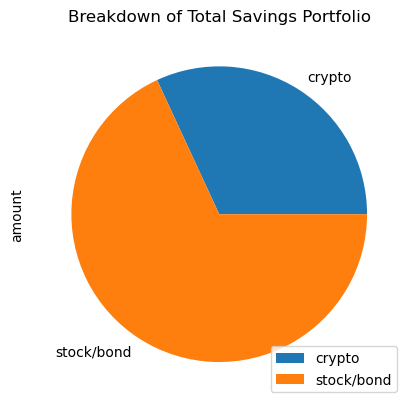

In [26]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart

savings_df.plot(kind = "pie", y = "amount", title = "Breakdown of Total Savings Portfolio")

# Need to adjust legend location to prevent text overlap
import matplotlib.pyplot as plt
plt.legend(loc = "lower right")


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [27]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3 * monthly_income

# Check the variable
emergency_fund_value


36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [28]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print("Congratulations! You have enough money in this fund!")
elif total_portfolio == emergency_fund_value:
    print("Congratulations on reaching this important financial goal!")
else:
    remaining_amount = emergency_fund_value - total_portfolio
    print(f"You are still ${remaining_amount} away from reaching your goal.")


Congratulations! You have enough money in this fund!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [29]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp("2020-01-09", tz = "America/New_York").isoformat()
end_date = pd.Timestamp("2023-01-09", tz = "America/New_York").isoformat()

In [30]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
prices_data_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Check how 'prices_data_df' looks now
display(prices_data_df)

# Reorganize the DataFrame
# Separate ticker data
SPY = prices_data_df[prices_data_df['symbol']=='SPY'].drop('symbol', axis = 1)
AGG = prices_data_df[prices_data_df['symbol']=='AGG'].drop('symbol', axis = 1)

# Concatenate the ticker DataFrames
prices_data_df = pd.concat([SPY, AGG], axis = 1, keys = ["SPY", "AGG"])

# Display both the first and last five rows of the DataFrame
display((prices_data_df).head())
display((prices_data_df).head())

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-01-09 05:00:00+00:00,112.49,112.79,112.4600,112.79,9110852,13407,112.730232,AGG
2020-01-10 05:00:00+00:00,112.90,112.99,112.8200,112.98,4198053,11555,112.924604,AGG
2020-01-13 05:00:00+00:00,112.89,112.94,112.8250,112.91,4465340,19122,112.893617,AGG
2020-01-14 05:00:00+00:00,112.97,113.02,112.9300,113.01,3626984,13469,112.986317,AGG
2020-01-15 05:00:00+00:00,113.18,113.19,113.0700,113.18,3896304,11396,113.155752,AGG
...,...,...,...,...,...,...,...,...
2023-01-03 05:00:00+00:00,384.37,386.43,377.8310,380.82,74330774,585048,380.961150,SPY
2023-01-04 05:00:00+00:00,383.18,385.88,380.0000,383.76,85425119,628498,383.151245,SPY
2023-01-05 05:00:00+00:00,381.72,381.76,378.7600,379.38,76079710,523811,380.264217,SPY


SPY                                     \
                               open    high      low   close    volume   
timestamp                                                                
2020-01-09 05:00:00+00:00  326.1600  326.73  325.520  326.59  48582601   
2020-01-10 05:00:00+00:00  327.2899  327.46  325.200  325.64  53057389   
2020-01-13 05:00:00+00:00  326.3900  327.96  325.920  327.92  47262010   
2020-01-14 05:00:00+00:00  327.4700  328.62  326.844  327.42  62972316   
2020-01-15 05:00:00+00:00  327.3500  329.02  327.260  328.16  72070483   

                                                      AGG                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2020-01-09 05:00:00+00:00      242161  326.093557  112.49  112.79  112.460   
2020-01-10 05:00:00+00:00      236220  326.407649  112.90  112.99  112.820   
2020-01-13 05:00:00+00:00      217434  327.270101  112.89  112.94  112.825   
2020-01-14 05:00:00+00:00      331314  327.600324  112.97  113.02  112.930   
2020-01-15 05:00:00+00:00      293440  328.144958  113.18  113.19  113.070   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2020-01-09 05:00:00+00:00  112.79  9110852       13407  112.730232  
2020-01-10 05:00:00+00:00  112.98  4198053       11555  112.924604  
2020-01-13 05:00:00+00:00  112.91  4465340       19122  112.893617  
2020-01-14 05:00:00+00:00  113.01  3626984       13469  112.986317  
2020-01-15 05:00:00+00:00  113.18  3896304       11396  113.155752

SPY                                     \
                               open    high      low   close    volume   
timestamp                                                                
2020-01-09 05:00:00+00:00  326.1600  326.73  325.520  326.59  48582601   
2020-01-10 05:00:00+00:00  327.2899  327.46  325.200  325.64  53057389   
2020-01-13 05:00:00+00:00  326.3900  327.96  325.920  327.92  47262010   
2020-01-14 05:00:00+00:00  327.4700  328.62  326.844  327.42  62972316   
2020-01-15 05:00:00+00:00  327.3500  329.02  327.260  328.16  72070483   

                                                      AGG                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2020-01-09 05:00:00+00:00      242161  326.093557  112.49  112.79  112.460   
2020-01-10 05:00:00+00:00      236220  326.407649  112.90  112.99  112.820   
2020-01-13 05:00:00+00:00      217434  327.270101  112.89  112.94  112.825   
2020-01-14 05:00:00+00:00      331314  327.600324  112.97  113.02  112.930   
2020-01-15 05:00:00+00:00      293440  328.144958  113.18  113.19  113.070   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2020-01-09 05:00:00+00:00  112.79  9110852       13407  112.730232  
2020-01-10 05:00:00+00:00  112.98  4198053       11555  112.924604  
2020-01-13 05:00:00+00:00  112.91  4465340       19122  112.893617  
2020-01-14 05:00:00+00:00  113.01  3626984       13469  112.986317  
2020-01-15 05:00:00+00:00  113.18  3896304       11396  113.155752

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [31]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_60SPY_40AGG_weight = MCSimulation(
    portfolio_data = prices_data_df,
    weights = [0.60, 0.40],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

# Review the simulation input data
MC_60SPY_40AGG_weight.portfolio_data


SPY                                       \
                               open    high       low   close     volume   
timestamp                                                                  
2020-01-09 05:00:00+00:00  326.1600  326.73  325.5200  326.59   48582601   
2020-01-10 05:00:00+00:00  327.2899  327.46  325.2000  325.64   53057389   
2020-01-13 05:00:00+00:00  326.3900  327.96  325.9200  327.92   47262010   
2020-01-14 05:00:00+00:00  327.4700  328.62  326.8440  327.42   62972316   
2020-01-15 05:00:00+00:00  327.3500  329.02  327.2600  328.16   72070483   
...                             ...     ...       ...     ...        ...   
2023-01-03 05:00:00+00:00  384.3700  386.43  377.8310  380.82   74330774   
2023-01-04 05:00:00+00:00  383.1800  385.88  380.0000  383.76   85425119   
2023-01-05 05:00:00+00:00  381.7200  381.76  378.7600  379.38   76079710   
2023-01-06 05:00:00+00:00  382.6100  389.25  379.4127  388.08  103741286   
2023-01-09 05:00:00+00:00  390.3700  393.70  387.6700  387.86   73999806   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2020-01-09 05:00:00+00:00      242161  326.093557          NaN  112.49   
2020-01-10 05:00:00+00:00      236220  326.407649    -0.002909  112.90   
2020-01-13 05:00:00+00:00      217434  327.270101     0.007002  112.89   
2020-01-14 05:00:00+00:00      331314  327.600324    -0.001525  112.97   
2020-01-15 05:00:00+00:00      293440  328.144958     0.002260  113.18   
...                               ...         ...          ...     ...   
2023-01-03 05:00:00+00:00      585048  380.961150    -0.004210   97.97   
2023-01-04 05:00:00+00:00      628498  383.151245     0.007720   98.17   
2023-01-05 05:00:00+00:00      523811  380.264217    -0.011413   97.64   
2023-01-06 05:00:00+00:00      683816  385.248218     0.022932   98.13   
2023-01-09 05:00:00+00:00      550008  390.361862    -0.000567   99.06   

                                                                          \
                             high      low   close    volume trade_count   
timestamp                                                                  
2020-01-09 05:00:00+00:00  112.79  112.460  112.79   9110852       13407   
2020-01-10 05:00:00+00:00  112.99  112.820  112.98   4198053       11555   
2020-01-13 05:00:00+00:00  112.94  112.825  112.91   4465340       19122   
2020-01-14 05:00:00+00:00  113.02  112.930  113.01   3626984       13469   
2020-01-15 05:00:00+00:00  113.19  113.070  113.18   3896304       11396   
...                           ...      ...     ...       ...         ...   
2023-01-03 05:00:00+00:00   97.97   97.365   97.56  19923745       50478   
2023-01-04 05:00:00+00:00   98.25   97.890   98.10   9792320       28896   
2023-01-05 05:00:00+00:00   98.06   97.565   98.02   9675668       25578   
2023-01-06 05:00:00+00:00   99.15   98.040   99.09   8484694       28134   
2023-01-09 05:00:00+00:00   99.50   99.000   99.34   7849650       25384   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-01-09 05:00:00+00:00  112.730232          NaN  
2020-01-10 05:00:00+00:00  112.924604     0.001685  
2020-01-13 05:00:00+00:00  112.893617    -0.000620  
2020-01-14 05:00:00+00:00  112.986317     0.000886  
2020-01-15 05:00:00+00:00  113.155752     0.001504  
...                               ...          ...  
2023-01-03 05:00:00+00:00   97.592200     0.005877  
2023-01-04 05:00:00+00:00   98.032508     0.005535  
2023-01-05 05:00:00+00:00   97.882382    -0.000815  
2023-01-06 05:00:00+00:00   98.849728     0.010916  
2023-01-09 05:00:00+00:00   99.318503     0.002523  

[756 rows x 16 columns]

In [ ]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_60SPY_40AGG_weight.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\marvi\desktop\Module_5_Challenge_FINAL\Challenge_Files\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.


In [ ]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_60SPY_40AGG_line_plot = MC_60SPY_40AGG_weight.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

In [ ]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_60SPY_40AGG_distribution_plot = MC_60SPY_40AGG_weight.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [ ]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_60SPY_40AGG_weight_table = MC_60SPY_40AGG_weight.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(MC_60SPY_40AGG_weight_table)

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of the stock and bond portion of the members portfolio is: ${total_stocks_bonds: .2f}.")

total_stocks_bonds = float(total_stocks_bonds)
display(total_stocks_bonds)

In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = round(MC_60SPY_40AGG_weight_table[8] * total_stocks_bonds, 2)
ci_upper_thirty_cumulative_return = round(MC_60SPY_40AGG_weight_table[9] * total_stocks_bonds, 2)

# Print the result of your calculations
print(f"There is a 95% chance that the current investment amount of $62,532.60 in the stock/bond portfolio "
      f"with a 60% weight in SPY and a 40% weight in AGG over the next 30 years will end "
      f"within the range of ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}.")


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [ ]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_80SPY_20AGG_weight = MCSimulation(
    portfolio_data = prices_data_df,
    weights = [0.80, 0.20],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

# Review the simulation input data
MC_80SPY_20AGG_weight.portfolio_data


In [ ]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_80SPY_20AGG_weight.calc_cumulative_return()


In [ ]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_80SPY_20AGG_line_plot = MC_80SPY_20AGG_weight.plot_simulation()


In [ ]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_80SPY_20AGG_distribution_plot = MC_80SPY_20AGG_weight.plot_distribution()


In [ ]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_80SPY_20AGG_weight_table = MC_80SPY_20AGG_weight.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(MC_80SPY_20AGG_weight_table)

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"${total_stocks_bonds: .2f}")


In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(MC_80SPY_20AGG_weight_table[8] * total_stocks_bonds, 2)
ci_upper_ten_cumulative_return = round(MC_80SPY_20AGG_weight_table[9] * total_stocks_bonds, 2)

# Print the result of your calculations
print(f"There is a 95% chance that the current investment amount of $62,532.60 in the stock/bond portfolio "
      f"with an 80% weight in SPY and a 20% weight in AGG over the next 10 years will end within the range of "
      f" ${ci_lower_ten_cumulative_return} and ${ci_upper_ten_cumulative_return}.")


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?